# Unsupervised Learning Clustering ------- trips data


#  Clustering the flow by weekend and week days
- Aggregate origin-destinations data on hourly base, so you will have all OD flows in
hourly basis.
- Perform a clustering algorithm without considering the days feature, to see if you
can cluster the O/D flows in two clusters: weekend and week days.
- Then run another clustering algorithm to cluster all the stations who share similar
temporal patterns (ex. Early morning flow, etc)
- Try different numbers of clusters and investigate the optimal number of clusters by
justifying your approach and interpreting the results.
- Try to cluster different profiles of users based on their information (age, flow
locations, etc) and show how the clustering result present different types of profiles.

In [4]:
import folium
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
# data cleaning 
Trip201710=pd.read_csv('hubway-data/201710-hubway-tripdata.csv')
Trip201710.dropna(axis=0,how='any',inplace = True)
Trip201710[['tripduration']]/60
Trip201710.rename(columns={'birth year':'birth_year'},inplace = True)
Trip201710[Trip201710.birth_year!= '\\N']
trip_10=Trip201710
trip_10.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth_year,gender
0,125,2017-10-01 00:03:43,2017-10-01 00:05:48,107,Ames St at Main St,42.362500,-71.088220,117,Binney St / Sixth St,42.366095,-71.086388,720,Subscriber,1992,1
1,1195,2017-10-01 00:04:24,2017-10-01 00:24:19,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,66,Allston Green District - Griggs St at Commonwe...,42.349225,-71.132753,1320,Subscriber,1989,1
2,513,2017-10-01 00:04:32,2017-10-01 00:13:05,227,Silber Way,42.349496,-71.100576,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,166,Subscriber,1996,1


In [5]:
trip_10=trip_10[['tripduration','start station id','start station latitude','start station longitude','stoptime']]
trip_10['hour']=pd.to_datetime(trip_10['stoptime'],format="%Y/%m/%d %H:%M:%S")
trip_10

df=trip_10
temp = pd.DatetimeIndex(df['hour'])
df['Date'] = temp.date
df['Time'] = temp.time
df['hourss'] = temp.hour
df['year'] = temp.year
df['month'] = temp.month
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163662 entries, 0 to 163661
Data columns (total 11 columns):
tripduration               163662 non-null int64
start station id           163662 non-null int64
start station latitude     163662 non-null float64
start station longitude    163662 non-null float64
stoptime                   163662 non-null object
hour                       163662 non-null datetime64[ns]
Date                       163662 non-null object
Time                       163662 non-null object
hourss                     163662 non-null int64
year                       163662 non-null int64
month                      163662 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 15.0+ MB


<ipython-input-5-41d9ac91867e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_10['hour']=pd.to_datetime(trip_10['stoptime'],format="%Y/%m/%d %H:%M:%S")
<ipython-input-5-41d9ac91867e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = temp.date
<ipython-input-5-41d9ac91867e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

In [6]:
np_trip= df.groupby('Date').count()
nb_trip=list(np_trip.tripduration)

In [7]:
df

,tripduration,start station id,start station latitude,start station longitude,stoptime,hour,Date,Time,hourss,year,month
0,125,107,42.362500,-71.088220,2017-10-01 00:05:48,2017-10-01 00:05:48,2017-10-01,00:05:48,0,2017,10
1,1195,46,42.343666,-71.085824,2017-10-01 00:24:19,2017-10-01 00:24:19,2017-10-01,00:24:19,0,2017,10
2,513,227,42.349496,-71.100576,2017-10-01 00:13:05,2017-10-01 00:13:05,2017-10-01,00:13:05,0,2017,10
3,1609,60,42.360758,-71.071329,2017-10-01 00:33:24,2017-10-01 00:33:24,2017-10-01,00:33:24,0,2017,10
4,246,22,42.352175,-71.055547,2017-10-01 00:13:14,2017-10-01 00:13:14,2017-10-01,00:13:14,0,2017,10
...,...,...,...,...,...,...,...,...,...,...,...
163657,1555,177,42.362648,-71.100061,2017-11-01 00:21:06,2017-11-01 00:21:06,2017-11-01,00:21:06,0,2017,11
163658,370,76,42.366426,-71.105495,2017-11-01 00:03:14,2017-11-01 00:03:14,2017-11-01,00:03:14,0,2017,11
163659,4422,11,42.338629,-71.106500,2017-10-31 23:09:11,2017-10-31 23:09:11,2017-10-31,23:09:11,23,2017,10
163660,897,11,42.338629,-71.106500,2017-10-31 22:51:56,2017-10-31 22:51:56,2017-10-31,22:51:56,22,2017,10


In [8]:

df_new=pd.pivot_table(df,index='Date',columns='hourss',values='tripduration',aggfunc='count')
df_new.replace([np.nan],0,inplace=True)
df_new.head()

hourss,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-01,43.0,57.0,55.0,10.0,3.0,7.0,22.0,30.0,86.0,157.0,...,420.0,431.0,459.0,436.0,430.0,280.0,179.0,130.0,93.0,47.0
2017-10-02,31.0,12.0,6.0,1.0,4.0,27.0,108.0,361.0,673.0,442.0,...,263.0,301.0,520.0,793.0,598.0,337.0,241.0,147.0,125.0,75.0
2017-10-03,28.0,13.0,4.0,0.0,6.0,37.0,116.0,405.0,728.0,469.0,...,236.0,297.0,545.0,766.0,655.0,381.0,234.0,157.0,118.0,79.0
2017-10-04,32.0,11.0,3.0,2.0,3.0,33.0,117.0,410.0,787.0,466.0,...,278.0,297.0,543.0,777.0,652.0,351.0,254.0,185.0,111.0,76.0
2017-10-05,42.0,13.0,5.0,6.0,4.0,40.0,143.0,406.0,709.0,463.0,...,286.0,317.0,497.0,733.0,617.0,388.0,266.0,141.0,139.0,113.0


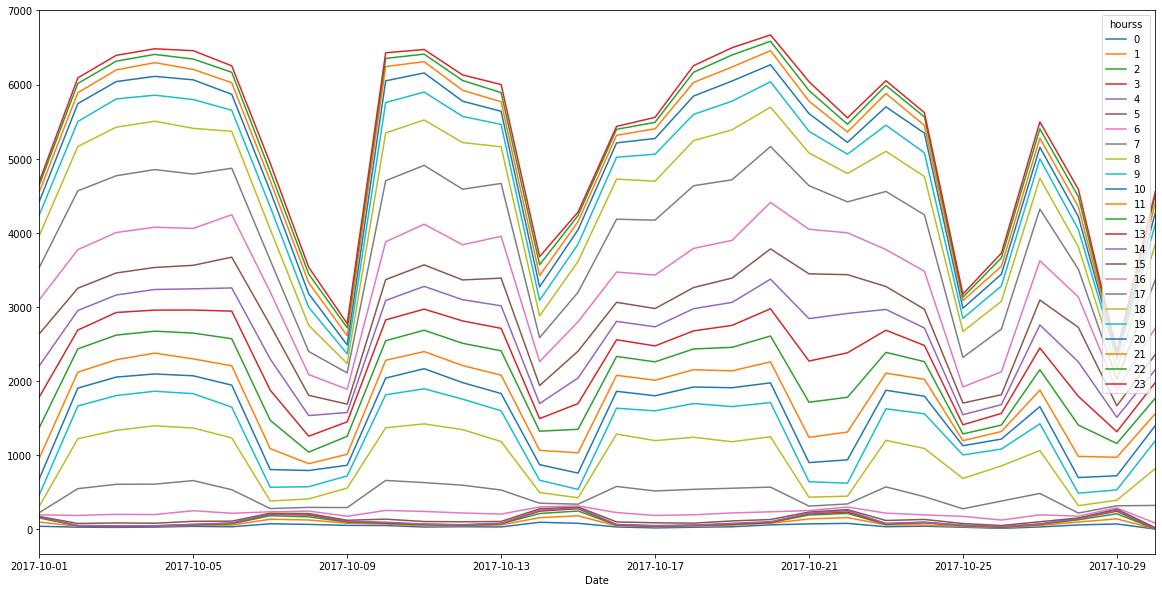

In [9]:
# show one day flow selon hours
#
df_new=df_new.iloc[:30]
df_new.plot(kind='line',stacked = True,figsize=(20,10))

In [10]:
# build the model 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=600)
kmeans.fit(df_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=600, tol=0.0001, verbose=0)

In [11]:
labes=kmeans.fit_predict(df_new)
#plt.figure(figsize=(10, 8))
labes

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1], dtype=int32)

<Figure size 720x576 with 0 Axes>

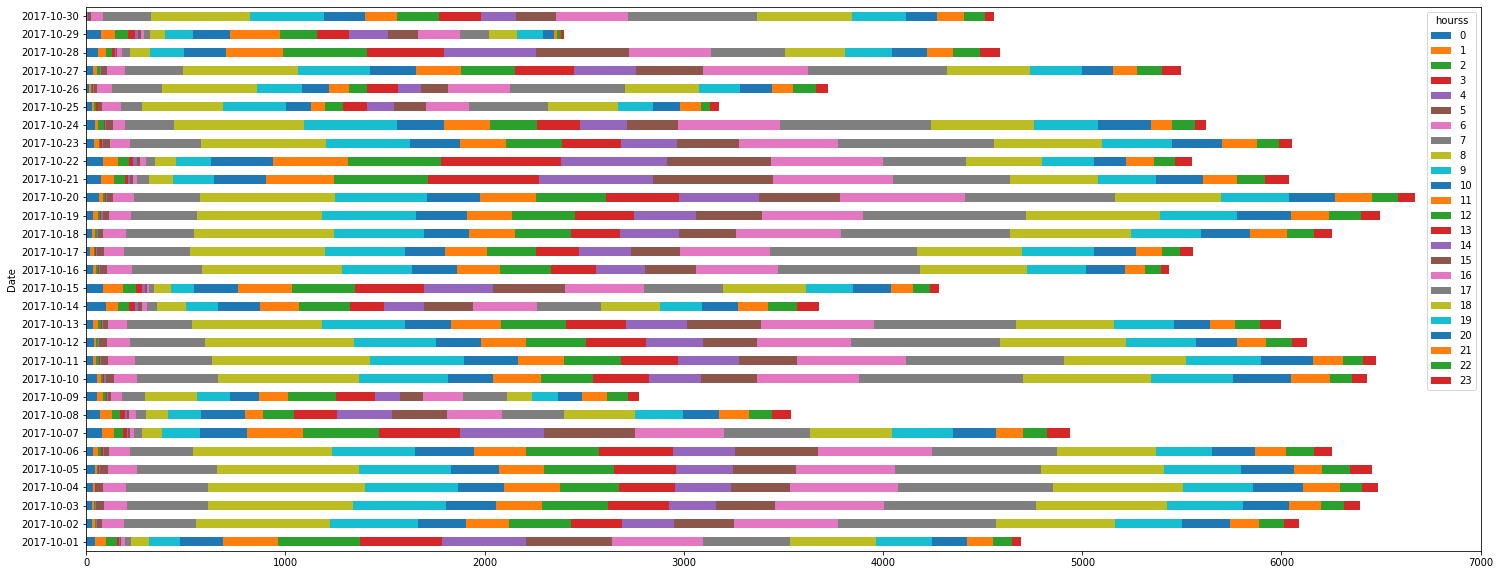

In [12]:
#df_new['labels']=labes
plt.figure(figsize=(10, 8))
df_new.plot(kind='barh',stacked = True,figsize=(25,10))

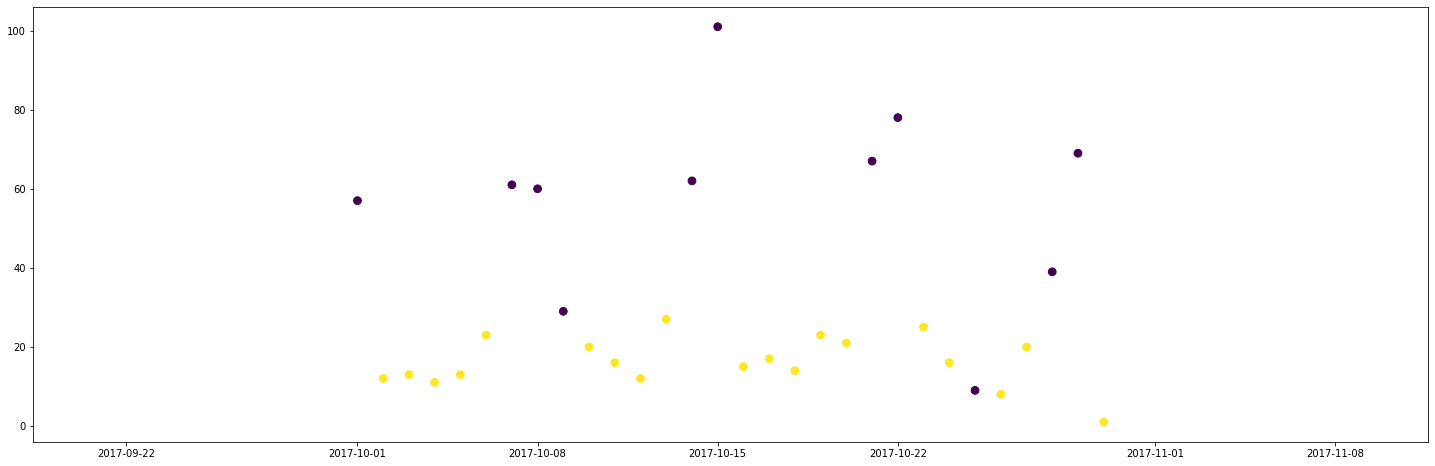

In [13]:
#plt.figure(figsize=(10, 8))
#cluser2
plt.figure(figsize=(25,8))
plt.scatter(df_new.index[:],df_new[1],s=60,c=labes)


In [14]:
#
nb_trip=np_trip.iloc[:30]
#c=np.array(nb_trip['hour'])

In [15]:
nb_trip=nb_trip[['tripduration']]
nb_trip['label']=labes
nb_trip

,tripduration,label
Date,,
2017-10-01,4693,0
2017-10-02,6089,1
2017-10-03,6394,1
2017-10-04,6482,1
2017-10-05,6456,1
2017-10-06,6252,1
2017-10-07,4939,0
2017-10-08,3536,0
2017-10-09,2776,0


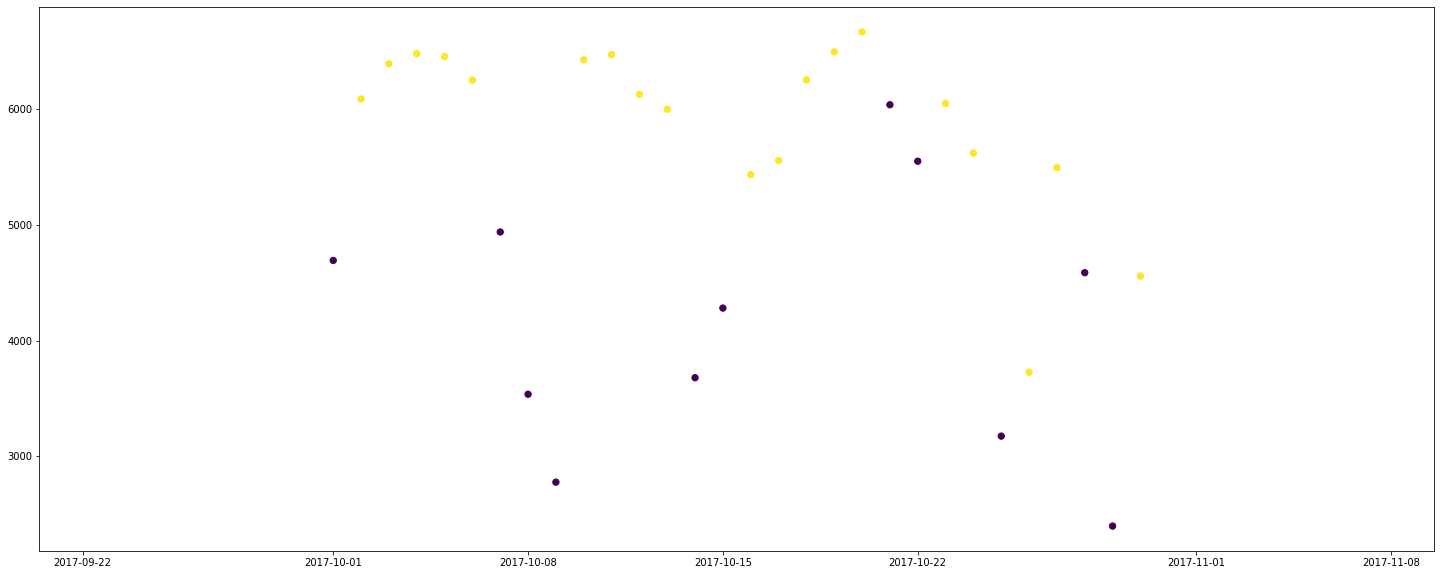

In [16]:
#plt.figure(figsize=(10, 8))
#cluser2
plt.figure(figsize=(25, 10))
plt.scatter(nb_trip.index,nb_trip.tripduration,s=40,c=nb_trip.label)

# 
Then run another clustering algorithm to cluster all the stations who share similar temporal patterns (ex. Early morning flow, etc)


In [43]:
df_sta=pd.pivot_table(df,index='start station id',columns='hourss',values='tripduration',aggfunc='count')
df_sta.replace([np.nan],0,inplace=True)
df_sta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 1 to 230
Data columns (total 24 columns):
0     197 non-null float64
1     197 non-null float64
2     197 non-null float64
3     197 non-null float64
4     197 non-null float64
5     197 non-null float64
6     197 non-null float64
7     197 non-null float64
8     197 non-null float64
9     197 non-null float64
10    197 non-null float64
11    197 non-null float64
12    197 non-null float64
13    197 non-null float64
14    197 non-null float64
15    197 non-null float64
16    197 non-null float64
17    197 non-null float64
18    197 non-null float64
19    197 non-null float64
20    197 non-null float64
21    197 non-null float64
22    197 non-null float64
23    197 non-null float64
dtypes: float64(24)
memory usage: 38.5 KB


In [44]:
df_sta.head()

hourss,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start station id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
3,2.0,0.0,3.0,4.0,0.0,0.0,2.0,18.0,24.0,23.0,...,48.0,47.0,50.0,120.0,49.0,26.0,11.0,8.0,4.0,1.0
4,17.0,12.0,13.0,2.0,0.0,30.0,40.0,86.0,95.0,39.0,...,52.0,56.0,73.0,95.0,88.0,36.0,26.0,43.0,35.0,21.0
5,19.0,11.0,4.0,7.0,1.0,0.0,1.0,21.0,68.0,50.0,...,52.0,68.0,77.0,118.0,92.0,93.0,79.0,56.0,34.0,31.0
6,9.0,5.0,4.0,0.0,2.0,21.0,33.0,50.0,155.0,116.0,...,68.0,87.0,101.0,145.0,139.0,105.0,69.0,31.0,29.0,22.0


In [20]:
# clusting the simlair station 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=600)
kmeans.fit(df_sta)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=600, tol=0.0001, verbose=0)

In [21]:
labes=kmeans.fit_predict(df_sta)
#plt.figure(figsize=(10, 8))
labes

array([1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 3, 0, 2, 2, 1, 2,
       2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1],
      dtype=int32)

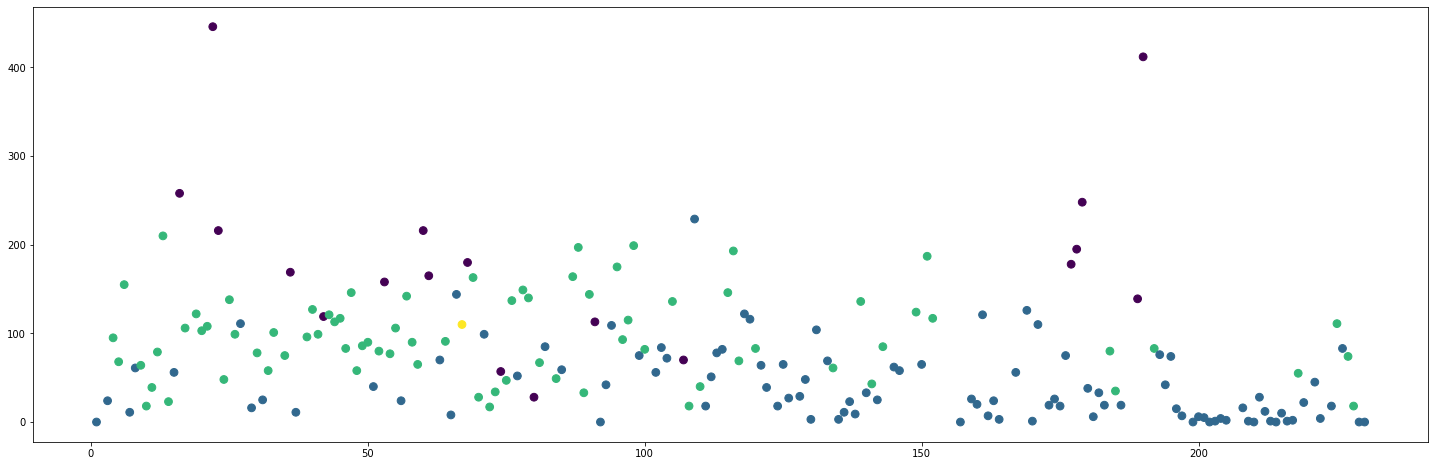

In [22]:
plt.figure(figsize=(25,8))
plt.scatter(df_sta.index[:],df_sta[8],s=60,c=labes)

In [23]:
sim_sta=df[['start station id','start station latitude','start station longitude','hourss']]
sim_sta.rename(index={'start station latitude':'lat'},inplace=True)
sim_sta.rename(index={'start station longitude':'log'},inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [24]:
station_lab=sim_sta

In [25]:
station_lab

,start station id,start station latitude,start station longitude,hourss
0,107,42.362500,-71.088220,0
1,46,42.343666,-71.085824,0
2,227,42.349496,-71.100576,0
3,60,42.360758,-71.071329,0
4,22,42.352175,-71.055547,0
...,...,...,...,...
163657,177,42.362648,-71.100061,0
163658,76,42.366426,-71.105495,0
163659,11,42.338629,-71.106500,23
163660,11,42.338629,-71.106500,22


In [26]:
sim_sta=pd.pivot_table(df,index='start station id',columns='hourss',values='tripduration',aggfunc='count')

In [27]:
sim_sta.replace([np.nan],0,inplace=True)

In [28]:
sim_sta

hourss,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start station id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
3,2.0,0.0,3.0,4.0,0.0,0.0,2.0,18.0,24.0,23.0,...,48.0,47.0,50.0,120.0,49.0,26.0,11.0,8.0,4.0,1.0
4,17.0,12.0,13.0,2.0,0.0,30.0,40.0,86.0,95.0,39.0,...,52.0,56.0,73.0,95.0,88.0,36.0,26.0,43.0,35.0,21.0
5,19.0,11.0,4.0,7.0,1.0,0.0,1.0,21.0,68.0,50.0,...,52.0,68.0,77.0,118.0,92.0,93.0,79.0,56.0,34.0,31.0
6,9.0,5.0,4.0,0.0,2.0,21.0,33.0,50.0,155.0,116.0,...,68.0,87.0,101.0,145.0,139.0,105.0,69.0,31.0,29.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,20.0,10.0,5.0,11.0,3.0,2.0,6.0,29.0,83.0,73.0,...,29.0,23.0,28.0,62.0,62.0,38.0,34.0,40.0,31.0,20.0
227,19.0,24.0,9.0,3.0,3.0,0.0,5.0,15.0,74.0,74.0,...,84.0,121.0,154.0,179.0,207.0,80.0,64.0,45.0,33.0,33.0
228,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,18.0,36.0,...,24.0,28.0,112.0,163.0,48.0,26.0,13.0,2.0,2.0,7.0


In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=600)
kmeans.fit(sim_sta)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=600, tol=0.0001, verbose=0)

In [30]:
labes=kmeans.fit_predict(sim_sta)
#plt.figure(figsize=(10, 8))
labes

array([1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 3, 0, 2, 2, 1, 2,
       2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1],
      dtype=int32)

In [31]:
sim_sta

hourss,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start station id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
3,2.0,0.0,3.0,4.0,0.0,0.0,2.0,18.0,24.0,23.0,...,48.0,47.0,50.0,120.0,49.0,26.0,11.0,8.0,4.0,1.0
4,17.0,12.0,13.0,2.0,0.0,30.0,40.0,86.0,95.0,39.0,...,52.0,56.0,73.0,95.0,88.0,36.0,26.0,43.0,35.0,21.0
5,19.0,11.0,4.0,7.0,1.0,0.0,1.0,21.0,68.0,50.0,...,52.0,68.0,77.0,118.0,92.0,93.0,79.0,56.0,34.0,31.0
6,9.0,5.0,4.0,0.0,2.0,21.0,33.0,50.0,155.0,116.0,...,68.0,87.0,101.0,145.0,139.0,105.0,69.0,31.0,29.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,20.0,10.0,5.0,11.0,3.0,2.0,6.0,29.0,83.0,73.0,...,29.0,23.0,28.0,62.0,62.0,38.0,34.0,40.0,31.0,20.0
227,19.0,24.0,9.0,3.0,3.0,0.0,5.0,15.0,74.0,74.0,...,84.0,121.0,154.0,179.0,207.0,80.0,64.0,45.0,33.0,33.0
228,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,18.0,36.0,...,24.0,28.0,112.0,163.0,48.0,26.0,13.0,2.0,2.0,7.0


In [32]:
sim_sta['label']=labes

In [33]:
sim_sta.rename(index={'start station id':'id'},inplace=True)
sim_sta.rename(index={'start station latitude':'lat'},inplace=True)
sim_sta.rename(index={'start station longitude':'log'},inplace=True)

In [34]:
sim_sta.head()
sim_sta.to_csv('result/sim_sta.csv')

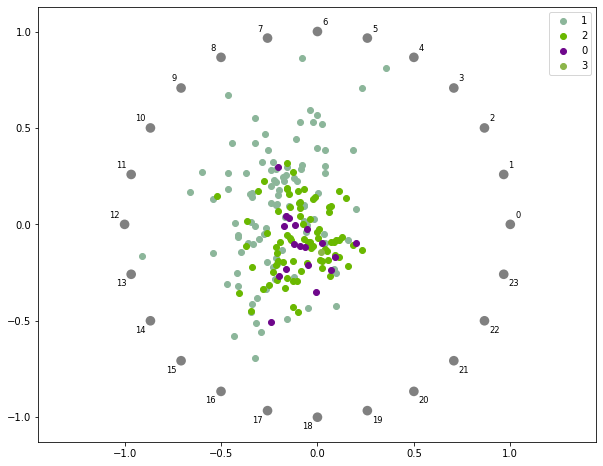

In [35]:
plt.figure(figsize=(10, 8))
vis=DataFrame({'station':sim_sta.index,'label':sim_sta.label})
from pandas.plotting import radviz
radviz(sim_sta,'label')

In [37]:
sta=station_lab.groupby('start station id').head()

In [38]:
sta.rename(columns={'start station latitude':'lat'},inplace=True)
sta.rename(columns={'start station longitude':'log'},inplace=True)
sta.rename(columns={'start station id':'id'},inplace=True)
sta

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,id,lat,log,hourss
0,107,42.362500,-71.088220,0
1,46,42.343666,-71.085824,0
2,227,42.349496,-71.100576,0
3,60,42.360758,-71.071329,0
4,22,42.352175,-71.055547,0
...,...,...,...,...
147249,222,42.343749,-71.062256,10
147815,222,42.343749,-71.062256,12
147925,222,42.343749,-71.062256,12
148467,181,42.381651,-71.134270,13


In [45]:
sta.to_csv('result/sta.csv')
vis.to_csv('result/vis.csv')

In [47]:
vis_sta=pd.read_csv('result/vis_sta.csv')
vis_sta.head(2)

,field_1,id,lat,log,hourss,vis_label
0,0,107,42.362500,-71.088220,0,0
1,1,46,42.343666,-71.085824,0,2


In [51]:
# create a map with popu
boston=folium.Map(location=[42.3599,-71.0599],tiles= 'Stamen Terrain',zoom_start = 10)
# visualization cartographie
import vincent
import json
import os
from folium.features import CustomIcon
for i in vis_sta.index:
    lon=vis_sta.iloc[i]['log']
    lat=vis_sta.iloc[i]['lat']
    if vis_sta.iloc[i]['vis_label']==0:
        folium.Circle(location=[lat,lon],color='blue',radius=10).add_to(boston)
    elif vis_sta.iloc[i]['vis_label']==1:
        folium.Circle(location=[lat,lon],color='yellow',radius=14).add_to(boston)
    elif vis_sta.iloc[i]['vis_label']==2:
        folium.Circle(location=[lat,lon],color='red',radius=6).add_to(boston)
    else:
        folium.Circle(location=[lat,lon],color='green',radius=12).add_to(boston)

boston


# 
Try different numbers of clusters and investigate the optimal number of clusters by justifying your approach and interpreting the results.

# The Elbow Method
The Elbow method is a "rule-of-thumb" approach to finding the optimal number of clusters. Here, we look at the cluster dispersion for different values of k:

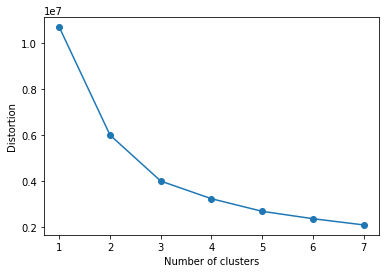

In [251]:
#
distortions = []
for i in range(1, 8):
    km = KMeans(n_clusters=i, 
                random_state=100)
    km.fit(df_sta)
    distortions.append(km.inertia_)

plt.plot(range(1, 8), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [133]:
#cluster in 4
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=600)
kmeans.fit(df_new)
labes=kmeans.fit_predict(df_new)
labes

array([2, 0, 0, 0, 0, 0, 2, 3, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 3, 3, 0, 2, 3, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

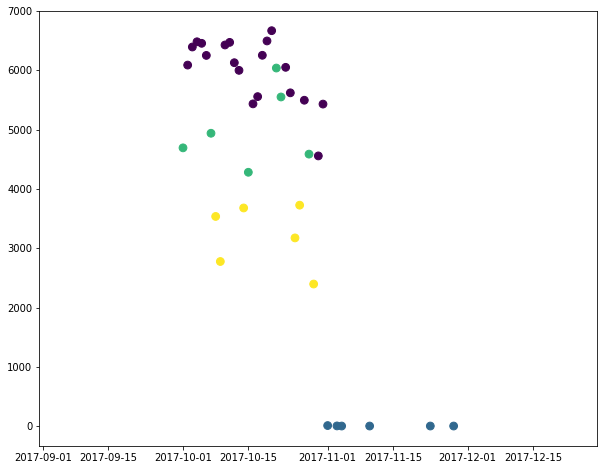

In [135]:
cluser4=DataFrame({'date':np.array(df_new.index),'nb_trip':np.array(nb_trip)})
cluser4['label']=labes
cluser4.head(3)
#cluser2
plt.figure(figsize=(10, 8))
plt.scatter(cluser4.date,cluser4.nb_trip,s=60,c=cluser4.label)


# 
Try to cluster different profiles of users based on their information (age, flow locations, etc) and show how the clustering result present different types of profiles.

In [181]:
import pandas as pd
Trip201501=pd.read_csv('hubway-data/201501-hubway-tripdata.csv')
Trip201502=pd.read_csv('hubway-data/201502-hubway-tripdata.csv')
Trip201503=pd.read_csv('hubway-data/201503-hubway-tripdata.csv')
Trip201504=pd.read_csv('hubway-data/201504-hubway-tripdata.csv')
Trip201505=pd.read_csv('hubway-data/201505-hubway-tripdata.csv')
Trip201506=pd.read_csv('hubway-data/201506-hubway-tripdata.csv')
Trip201507=pd.read_csv('hubway-data/201507-hubway-tripdata.csv')
Trip201508=pd.read_csv('hubway-data/201508-hubway-tripdata.csv')
Trip201509=pd.read_csv('hubway-data/201509-hubway-tripdata.csv')
Trip201510=pd.read_csv('hubway-data/201510-hubway-tripdata.csv')
Trip201511=pd.read_csv('hubway-data/201511-hubway-tripdata.csv')
Trip201512=pd.read_csv('hubway-data/201512-hubway-tripdata.csv')
Trip201601=pd.read_csv('hubway-data/201601-hubway-tripdata.csv')
Trip201602=pd.read_csv('hubway-data/201602-hubway-tripdata.csv')
Trip201603=pd.read_csv('hubway-data/201603-hubway-tripdata.csv')
Trip201604=pd.read_csv('hubway-data/201604-hubway-tripdata.csv')
Trip201605=pd.read_csv('hubway-data/201605-hubway-tripdata.csv')
Trip201606=pd.read_csv('hubway-data/201606-hubway-tripdata.csv')
Trip201607=pd.read_csv('hubway-data/201607-hubway-tripdata.csv')
Trip201608=pd.read_csv('hubway-data/201608-hubway-tripdata.csv')
Trip201609=pd.read_csv('hubway-data/201609-hubway-tripdata.csv')
Trip201610=pd.read_csv('hubway-data/201610-hubway-tripdata.csv')
Trip201611=pd.read_csv('hubway-data/201611-hubway-tripdata.csv')
Trip201701=pd.read_csv('hubway-data/201701-hubway-tripdata.csv')
Trip201702=pd.read_csv('hubway-data/201702-hubway-tripdata.csv')
Trip201703=pd.read_csv('hubway-data/201703-hubway-tripdata.csv')
Trip201704=pd.read_csv('hubway-data/201704-hubway-tripdata.csv')
Trip201705=pd.read_csv('hubway-data/201705-hubway-tripdata.csv')
Trip201706=pd.read_csv('hubway-data/201706-hubway-tripdata.csv')
Trip201707=pd.read_csv('hubway-data/201707-hubway-tripdata.csv')
Trip201708=pd.read_csv('hubway-data/201708-hubway-tripdata.csv')
Trip201709=pd.read_csv('hubway-data/201709-hubway-tripdata.csv')
Trip201710=pd.read_csv('hubway-data/201710-hubway-tripdata.csv')
Trip201711=pd.read_csv('hubway-data/201711-hubway-tripdata.csv')
Trip201712=pd.read_csv('hubway-data/201712-hubway-tripdata.csv')


In [182]:

import pandas as pd

a=[
    Trip201501['start station id'].count(),
    Trip201502['start station id'].count(),
    Trip201503['start station id'].count(),
   Trip201504['start station id'].count(),
   Trip201505['start station id'].count(),
   Trip201506['start station id'].count(),
   Trip201507['start station id'].count(),
   Trip201508['start station id'].count(),
   Trip201509['start station id'].count(),
   Trip201510['start station id'].count(),
   Trip201511['start station id'].count(),
   Trip201512['start station id'].count(),
   Trip201601['start station id'].count(),
   Trip201602['start station id'].count(),
   Trip201603['start station id'].count(),
   Trip201604['start station id'].count(),
   Trip201605['start station id'].count(),
   Trip201606['start station id'].count(),
   Trip201607['start station id'].count(),
   Trip201608['start station id'].count(),
   Trip201609['start station id'].count(),
   Trip201610['start station id'].count(),
   Trip201611['start station id'].count(),
   59000,
   Trip201701['start station id'].count(),
   Trip201702['start station id'].count(),
   Trip201703['start station id'].count(),
   Trip201704['start station id'].count(),
   Trip201705['start station id'].count(),
   Trip201706['start station id'].count(),
   Trip201707['start station id'].count(),
   Trip201708['start station id'].count(),
   Trip201709['start station id'].count(),
   Trip201710['start station id'].count(),
   Trip201711['start station id'].count(),
   Trip201712['start station id'].count(),]

b=['201501','201501','201503','201504','201505','201506','201507','201508','201509','201510','201511','201512','201601',
   '201602','201603','201604','201605','201606','201607','201608','201609','201610','201611','201612','201701','201702','201703','201704','201705',
   '201706','201707','201708','201709','201710','201711','201712']


In [183]:
Trip201501.usertype[Trip201501.usertype=='Subscriber'].count()

5484

In [184]:
user=[Trip201501.usertype[Trip201501.usertype=='Subscriber'].count(),
      Trip201502.usertype[Trip201502.usertype=='Subscriber'].count(),
      Trip201503.usertype[Trip201503.usertype=='Subscriber'].count(),
      Trip201504.usertype[Trip201504.usertype=='Subscriber'].count(),
      Trip201505.usertype[Trip201505.usertype=='Subscriber'].count(),
      Trip201506.usertype[Trip201506.usertype=='Subscriber'].count(),
      Trip201507.usertype[Trip201507.usertype=='Subscriber'].count(),
      Trip201508.usertype[Trip201508.usertype=='Subscriber'].count(),
      Trip201509.usertype[Trip201509.usertype=='Subscriber'].count(),
      Trip201510.usertype[Trip201510.usertype=='Subscriber'].count(),
      Trip201511.usertype[Trip201511.usertype=='Subscriber'].count(),
      Trip201512.usertype[Trip201512.usertype=='Subscriber'].count(),
      Trip201601.usertype[Trip201601.usertype=='Subscriber'].count(),
      Trip201602.usertype[Trip201602.usertype=='Subscriber'].count(),
      Trip201603.usertype[Trip201603.usertype=='Subscriber'].count(),
      Trip201604.usertype[Trip201604.usertype=='Subscriber'].count(),
      Trip201605.usertype[Trip201605.usertype=='Subscriber'].count(),
      Trip201606.usertype[Trip201606.usertype=='Subscriber'].count(),
      Trip201607.usertype[Trip201607.usertype=='Subscriber'].count(),
      Trip201608.usertype[Trip201608.usertype=='Subscriber'].count(),
      Trip201609.usertype[Trip201609.usertype=='Subscriber'].count(),
      Trip201610.usertype[Trip201610.usertype=='Subscriber'].count(),
      Trip201611.usertype[Trip201611.usertype=='Subscriber'].count(),
         59000,
      Trip201701.usertype[Trip201701.usertype=='Subscriber'].count(),
      Trip201702.usertype[Trip201702.usertype=='Subscriber'].count(),
      Trip201703.usertype[Trip201703.usertype=='Subscriber'].count(),
      Trip201704.usertype[Trip201704.usertype=='Subscriber'].count(),
      Trip201705.usertype[Trip201705.usertype=='Subscriber'].count(),
      Trip201706.usertype[Trip201706.usertype=='Subscriber'].count(),
      Trip201707.usertype[Trip201707.usertype=='Subscriber'].count(),
      Trip201708.usertype[Trip201708.usertype=='Subscriber'].count(),
      Trip201709.usertype[Trip201709.usertype=='Subscriber'].count(),
      Trip201710.usertype[Trip201710.usertype=='Subscriber'].count(),
      Trip201711.usertype[Trip201711.usertype=='Subscriber'].count(),
      Trip201712.usertype[Trip201712.usertype=='Subscriber'].count(),]


In [185]:
#user

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
data1=pd.DataFrame({'year':b,'Numb_trip':a})
#data1.plot(x='year', y='Numb_trip', kind='scatter',color='red',alpha=0.1, s=25);

In [314]:
data1.head(2)

,year,Numb_trip
0,201501,7840
1,201502,4020


In [315]:
data1['month']=[1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]

In [316]:
data1['yr']=[2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017]

In [317]:
data1

,year,Numb_trip,month,yr
0,201501,7840,1,2015
1,201502,4020,2,2015
2,201503,11271,3,2015
3,201504,55843,4,2015
4,201505,149143,5,2015
5,201506,144232,6,2015
6,201507,175321,7,2015
7,201508,160065,8,2015
8,201509,150516,9,2015
9,201510,126656,10,2015


In [8]:
#data1.head()
df=data1
Trip2015=df[df.year<201513]
trip2016=df[df.year>201600]
Trip2016=trip2016[trip2016.year<201613]
Trip2017=df[df.year>201700]
#plt.xticks(rotation='vertical')
#plt.plot(Trip2017['year'],Trip2017['Numb_trip'],linewidth=1)
Trip2017['Numb_trip'].sum()
trip2016 =list([Trip2016['Numb_trip']])
trip2017 =list([Trip2017['Numb_trip']])
trip2015=list([Trip2015['Numb_trip']])
np.asarray(trip2017)

data = {'Month':['January','February','March','April','May','June','July','August','September','October','November','December'],
       'NumberTrip2015':[7840,4020,11271,  55843, 149143, 144232, 175321, 160065,150516, 126656,  88735,  48916],
        'NumberTrip2016':[12055,14643,  41277,  84262, 129260, 164667, 167385, 174198,165690, 137865,  99910,  59000],
        'NumberTrip2017':[19518,17272,  31253,  99860, 127894, 161910, 175833, 190651,165386, 163662, 105463,  55072]}
from pandas import Series,DataFrame
trip = DataFrame(data)
trip.index=trip['Month']
trip.drop('Month',axis=1)

,NumberTrip2015,NumberTrip2016,NumberTrip2017
Month,,,
January,7840,12055,19518
February,4020,14643,17272
March,11271,41277,31253
April,55843,84262,99860
May,149143,129260,127894
June,144232,164667,161910
July,175321,167385,175833
August,160065,174198,190651
September,150516,165690,165386


In [299]:
trip['Month']

Month
January        January
February      February
March            March
April            April
May                May
June              June
July              July
August          August
September    September
October        October
November      November
December      December
Name: Month, dtype: object

In [9]:
#Trip201712
Tripstudy=Trip201712[['tripduration','gender','birth year']]
trip_time =Tripstudy[['tripduration']]/60
Tripstudy['trip_time']=trip_time
#Tripstudy
#Tripstudy=Tripstudy.drop('tripduration',axis=1,inplace =False)
trip_time = Tripstudy.trip_time.astype(int)
Tripstudy['trip_time']=trip_time
Tripstudy

<ipython-input-9-1647625341fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tripstudy['trip_time']=trip_time
<ipython-input-9-1647625341fa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tripstudy['trip_time']=trip_time


,tripduration,gender,birth year,trip_time
0,200,0,1982,3
1,365,1,1997,6
2,297,1,1977,4
3,1128,1,1991,18
4,2594,1,1963,43
...,...,...,...,...
55067,248,1,1965,4
55068,261,1,1955,4
55069,983,1,1987,16
55070,1751,1,1989,29


In [119]:
# deletiny the columne et the row
Tripstudy.rename(columns={'birth year':'birth_year'},inplace = True)
Tripstudy.dropna(axis=0,how='any',inplace = True)
data_clean = Tripstudy[Tripstudy.birth_year!= '\\N']
a=data_clean 
a=a.drop('tripduration',axis=1,inplace =False)
# add the new column
# fristly change the type of column for calcule
age=list(map(int,a.birth_year))
age=2020-np.array(age)
a['age']=age
a

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
<ipython-input-119-8c16afc0c3de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tripstudy.dropna(axis=0,how='any',inplace = True)


,gender,birth_year,trip_time,age
0,0,1982,3,38
1,1,1997,6,23
2,1,1977,4,43
3,1,1991,18,29
4,1,1963,43,57
...,...,...,...,...
55067,1,1965,4,55
55068,1,1955,4,65
55069,1,1987,16,33
55070,1,1989,29,31


In [120]:
# give the candition time super 5, age inside 90
a=a.drop('gender',axis=1,inplace=False)
a=a.drop('birth_year',axis=1,inplace=False)
# delete the unnormal_valeur
a = a[a.age<90]
a = a[a.trip_time>5]
data_study = a.sample(n=2000,random_state=123)

In [122]:
data_study
d=data_study
d= d.sample(n=1000,random_state=123)
d.age.describe()

count    1000.000000
mean       38.084000
std        11.565929
min        20.000000
25%        30.000000
50%        34.000000
75%        44.000000
max        86.000000
Name: age, dtype: float64

In [123]:
#0-1 changer traitement 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d=scaler.fit_transform(d)

#find the empty: isNA=TData.isnull()
#get the row of empty : TData[isNA.any(axis=1)]
#stand of NA : TData=TData.fillna('0')
#standard the data
dt=d
dt


array([[0.14035088, 0.54545455],
       [0.26315789, 0.12121212],
       [0.24561404, 0.09090909],
       ...,
       [0.03508772, 0.39393939],
       [0.07017544, 0.16666667],
       [0.0877193 , 0.21212121]])

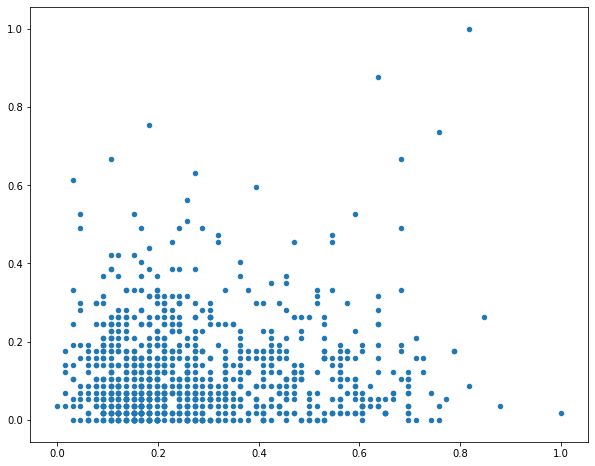

In [124]:
# visualizer the variable to see the distribution 
plt.figure(figsize=(10, 8))
plt.scatter(d[:,1],d[:,0],s=20)

In [129]:
# build the model 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=600)
kmeans.fit(d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=600, tol=0.0001, verbose=0)

In [130]:
labes=kmeans.fit_predict(d)

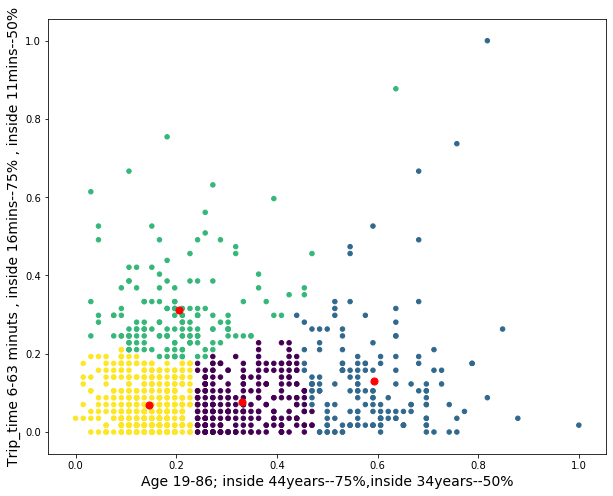

In [131]:
plt.figure(figsize=(10, 8))
plt.scatter(d[:, 1], d[:, 0], c=labes,s=20)
plt.xlabel('Age 19-86; inside 44years--75%,inside 34years--50%',size=14)
plt.ylabel('Trip_time 6-63 minuts , inside 16mins--75% , inside 11mins--50%',size=14)
#plt.plot([0.0,1.0],[0.5,0.5],c='red')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0],s=50,c='red')
#plt.text(0.2,1.0,'XX', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.show()
#d[:0]: birth_year
#d[:1]: trip_time

# Supervised Learning
- The idea is to predict bike flow based on history of rideships.
- Split your date into Train and Test set. You can learn on 1 year data and test on 1
month. (considering the yearly growth of users)
- Feel free to add features from other sources (eg. types of days, school holidays,
weather information, sociodemographic data, etc)
- Try a supervised learning model (ANN, XGBoost, SVM, etc) on your choice.
- Predict the flow for your test data and compare your results with the real data.
- Calculate the errors and explain how you can improve your results.